In [26]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [27]:
import networkx as nx

In [28]:
import re

In [29]:
test_String = "{name:'澳门', geoCoord:[113.54, 22.19]}"

In [30]:
pattern = re.compile(r"name:'(\w+)',\s+ Coord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [31]:
re.findall(pattern,test_String)

[]

In [32]:
city_location = {}

In [33]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [34]:
import math

In [35]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [36]:
def get_geo_distanve (city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [37]:
get_geo_distanve('上海','杭州')

153.5185697155768

In [38]:
import networkx as nx

In [39]:
citys = list(city_location.keys())

In [40]:
city_graph = nx.Graph()

In [41]:
city_graph.add_nodes_from(citys)

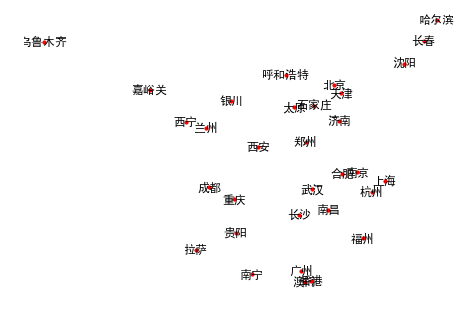

In [42]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [43]:
simple_location_info = {
    '北京':['太原'],
    '太原':['北京','西安','郑州'],
    '西安':['兰州','长沙'],
    '长沙':['南宁','福州']
}

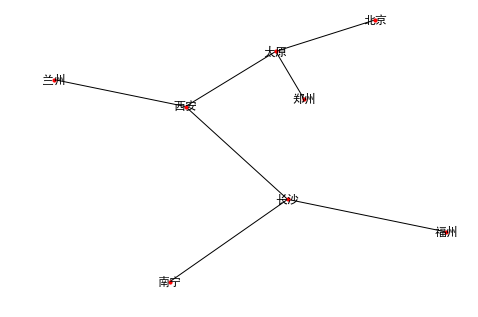

In [44]:
nx.draw(nx.Graph(simple_location_info),city_location,with_labels=True,node_size=10)

In [45]:
def search(start,destinition, connection_graph):
    pathes = [[start]]
    visitied = set()
    
    while pathes:
        path = pathes.pop()
        forininter = path[-1]
        
        if forininter in visitied:continue
        successors = connection_graph[forininter]
        
        for city in successors:
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == destinition: return new_path
        visitied.add(forininter)

In [46]:
def bfs(graph,start):
    """
    brath first serarch
    """
    
    visited = [start]
    
    seen = set()
    
    while visited:
        forinner = visited.pop(-1)
        
        if forinner in seen:
            for successor in graph[forinner]:
                if successor in seen: continue
                print(successor)
                visited.append(successor)
                
                visited = visited [successor] 
            seen.add(successor)
        return seen

In [47]:
bfs(simple_location_info,'兰州')

set()

In [49]:
search('北京','郑州',simple_location_info)

['北京', '太原', '郑州']

In [ ]:
def pretty_print(cities):
    print('🚗'.join(cities))

In [ ]:
pretty_print(search('北京','兰州',simple_location_info))

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
load_boston?

In [50]:
import requests

In [57]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [64]:
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
        蜘蛛侠：英雄远征 (豆瓣)
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    <link rel="apple-touch-icon" href="https://img3.doubanio.com/f/movie/d59b2715fdea4968a450ee5f6c95c7d7a2030065/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/52c9997d6d42db58eab418e976a14d5f3eff981e/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22d3284848/css/separation/_all.css" rel="stylesheet" type="text/css">

In [60]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [61]:
pattern = re.compile(what_we_want)

In [62]:
likes = pattern.findall(response.text)

In [63]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
